In [209]:
import numpy as np
import pandas as pd
import random as rd
import sys, os
import scipy.io as sio
# import pickle

In [210]:
rd.seed(50)

In [211]:
# #matlab_filename = sys.argv[1]
# print("Loading in matlab data - this takes ~1min and about 2gb memory")
# matlab_obj = sio.loadmat('realitymining.mat')
# print("Done loading matlab data.")
# print('Extracting valid subjects and creating id dictionaries.')


In [212]:
filename = 'realitymining'
print("Loading realitymining ~1min...")
infile = open(filename,'rb')
print("Done")

Loading realitymining ~1min...
Done


In [213]:
import pickle
print("Filling s structure ~1min...")
s = pickle.load(infile) 
print("Done")

Filling s structure ~1min...
Done


In [214]:
## Choosing subject 4
infile.close()
subjectID=4

M=s['data_mat'][0,subjectID-1].transpose() #Here we select the Matrix of Subject subjectID

In [215]:
M.shape

(180, 24)

In [216]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

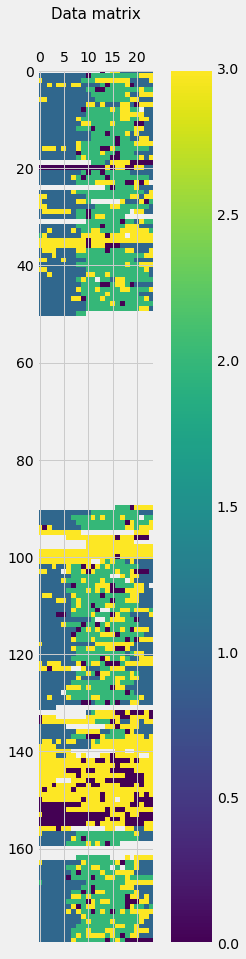

In [217]:
fig = plt.figure(figsize=(5,15))
axes = fig.add_subplot(111)
mat = axes.matshow(M)
fig.colorbar(mat)
axes.set_title('Data matrix', FontSize = 15)
#axes.set_xticks(range(24))
#axes.set_yticks(range(len(M.columns)))
plt.show()

## Part 1: Generate Binary Matrix Mbw and Data Explorarion

In [218]:
hours=np.size(M,1)
days=np.size(M,0)
num_labels=5

In [219]:
Mbw=np.zeros([days,hours*num_labels])

In [220]:
name_column=[]

for j in range(1,np.size(Mbw,1)+1):
    J1=hours*(num_labels-1)+1 #97=24*(5-1)+1
    if j >= J1:      
        name_column.append(str(j-J1)+'_off')
    else:
        J2=hours*(num_labels-2)+1
        if j>=J2:
            name_column.append(str(j-J2)+'_nsf')
        else:
            J3=hours*(num_labels-3)+1
            if j >= J3:
                name_column.append(str(j-J3)+'_els')
            else:
                J4=hours*(num_labels-4)+1
                if j >= J4:
                    name_column.append(str(j-J4)+'_wrk')
                else:
                    name_column.append(str(j-1)+'_hom')

In [221]:
len(name_column)

120

In [222]:
print(name_column)

['0_hom', '1_hom', '2_hom', '3_hom', '4_hom', '5_hom', '6_hom', '7_hom', '8_hom', '9_hom', '10_hom', '11_hom', '12_hom', '13_hom', '14_hom', '15_hom', '16_hom', '17_hom', '18_hom', '19_hom', '20_hom', '21_hom', '22_hom', '23_hom', '0_wrk', '1_wrk', '2_wrk', '3_wrk', '4_wrk', '5_wrk', '6_wrk', '7_wrk', '8_wrk', '9_wrk', '10_wrk', '11_wrk', '12_wrk', '13_wrk', '14_wrk', '15_wrk', '16_wrk', '17_wrk', '18_wrk', '19_wrk', '20_wrk', '21_wrk', '22_wrk', '23_wrk', '0_els', '1_els', '2_els', '3_els', '4_els', '5_els', '6_els', '7_els', '8_els', '9_els', '10_els', '11_els', '12_els', '13_els', '14_els', '15_els', '16_els', '17_els', '18_els', '19_els', '20_els', '21_els', '22_els', '23_els', '0_nsf', '1_nsf', '2_nsf', '3_nsf', '4_nsf', '5_nsf', '6_nsf', '7_nsf', '8_nsf', '9_nsf', '10_nsf', '11_nsf', '12_nsf', '13_nsf', '14_nsf', '15_nsf', '16_nsf', '17_nsf', '18_nsf', '19_nsf', '20_nsf', '21_nsf', '22_nsf', '23_nsf', '0_off', '1_off', '2_off', '3_off', '4_off', '5_off', '6_off', '7_off', '8_off'

In [223]:
for i in range(1,days+1):
        for j in range(1,hours+1):
            place=M[i-1][j-1]
            if np.isnan(place):
                Ji=hours*(num_labels-1)+1 #97=24*(5-1)+1
                Jf=hours*num_labels #120
                J=Ji+j-1
                Mbw[i-1][J-1]=1
            else:
                if place==0:
                    Ji=hours*(num_labels-2)+1 #73
                    Jf=hours*(num_labels-1)   #96
                    J=Ji+j-1
                    Mbw[i-1][J-1]=1
                else:
                    Ji=int(hours*(place-1)+1) # (1-24) for house and (25-48) for work 
                    Jf=int(hours*place)       # and (49-72) for elsewehere
                    J=int(Ji+j-1)
                    Mbw[i-1][J-1]=1

In [224]:
print(Mbw)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


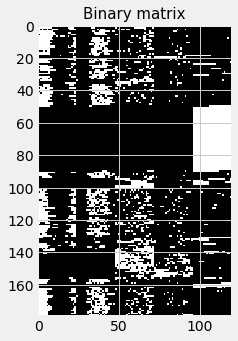

In [225]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.set_title('Binary matrix', FontSize = 15)
ax1.imshow(Mbw, cmap=cm.Greys_r)

In [226]:
df = pd.DataFrame(data=Mbw,index=None,columns=name_column)
df.head()

,0_hom,1_hom,2_hom,3_hom,4_hom,5_hom,6_hom,7_hom,8_hom,9_hom,...,14_off,15_off,16_off,17_off,18_off,19_off,20_off,21_off,22_off,23_off
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
from sklearn.decomposition import PCA
from numpy.testing import assert_array_almost_equal
import sklearn

U, S, VT = np.linalg.svd(Mbw - Mbw.mean(0))

# pca = decomposition.PCA(n_components = 3)
## create pca model with 3 eigen vectors
pca = PCA(n_components = 3)
## fit model to data
pca.fit(df) 

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [228]:
pca.components_.shape

(3, 120)

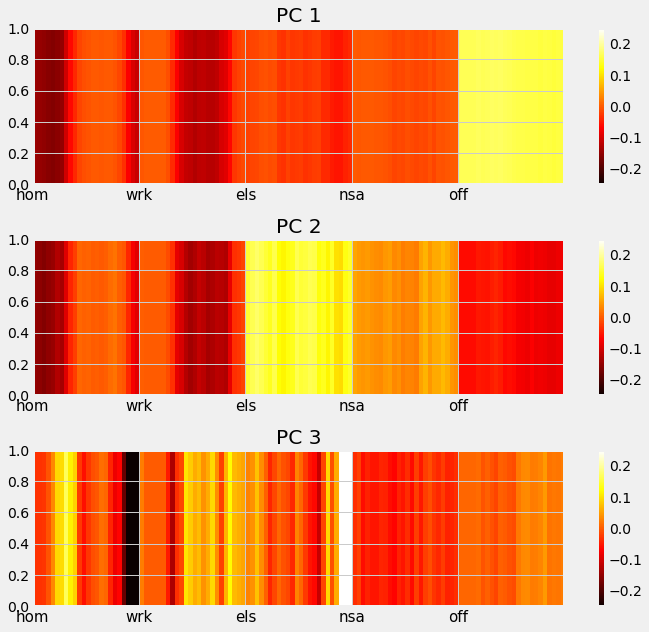

In [229]:
## Plot top 3 principa components
PC_dictionnary = {} #this step creates a Data frames with the PCs
Principal_components_names = ['PC ' + str(i) for i in range(1,len(name_column)+1)]
for idx in range(3): ##len(Principal_components_names)
    PC_dictionnary[Principal_components_names[idx]] = pca.components_[idx]

PC_data = pd.DataFrame(data = PC_dictionnary) 
# print("The principal components of this dataset are:")

#we create a matrix to visualize it as in the paper
PC_np=PC_data.to_numpy() 

name_state = ['hom','wrk','els','nsa','off']

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(10,9))

im=ax1.imshow(np.transpose(PC_np[:,0:1]),vmin=-0.25,vmax=0.25,extent=[0,120,0,1], aspect='auto',cmap=cm.hot)
ax1.set_title('PC 1')
fig.colorbar(im, ax=ax1)
ax1.set_xticks(np.arange(0,120,24))
ax1.set_xticklabels(name_state, FontSize = 15)

im2=ax2.imshow(np.transpose(PC_np[:,1:2]),vmin=-0.25,vmax=0.25,extent=[0,120,0,1], aspect='auto',cmap=cm.hot)
ax2.set_title('PC 2')
fig.colorbar(im2, ax=ax2)
ax2.set_xticks(np.arange(0,120,24))
ax2.set_xticklabels(name_state, FontSize = 15)

im3=ax3.imshow(np.transpose(PC_np[:,2:3]),vmin=-0.25,vmax=0.25,extent=[0,120,0,1], aspect='auto',cmap=cm.hot)
ax3.set_title('PC 3')
fig.colorbar(im3, ax=ax3)
ax3.set_xticks(np.arange(0,120,24))
ax3.set_xticklabels(name_state, FontSize = 15)

plt.tight_layout()
plt.show()

### Draw the reconstruction of these three sample days with the first three eigenvectors. (10 pts) 

In [230]:
## fit data
projected_data = pca.fit_transform(df)
MBW_recons = pca.inverse_transform(pca.fit_transform(df))

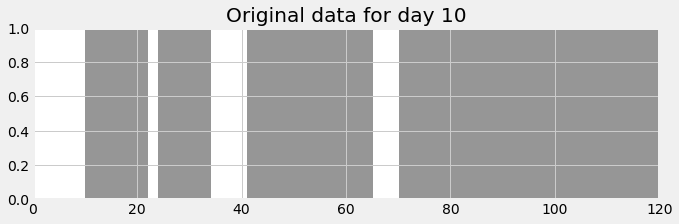

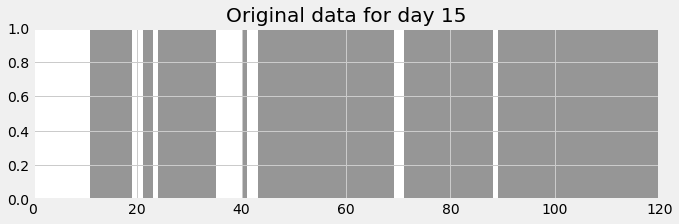

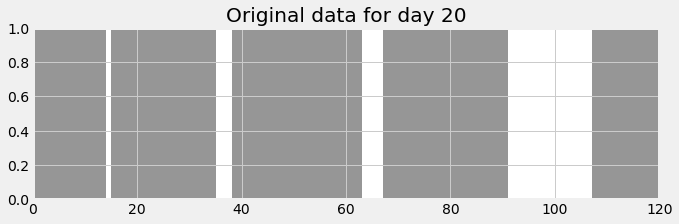

In [231]:
np.random.seed(50)
indices = [10,15,20]#np.random.choice(days, 5, replace=False)
## plot values for day 5
# i=0
for i in range(len(indices)):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,i+1),
    plt.title('Original data for day {}'.format(indices[i]))
    plt.imshow(Mbw[indices[i]-1:indices[i],:],vmin=-0.25,vmax=0.25,extent=[0,120,0,1], aspect='auto',cmap=cm.Greys_r)
    # plt.axis('off')

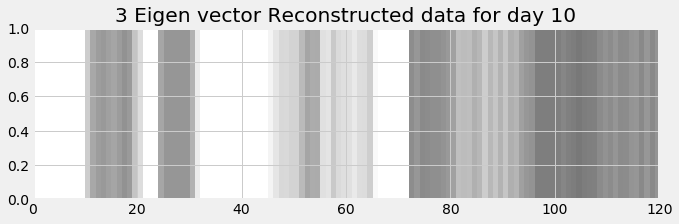

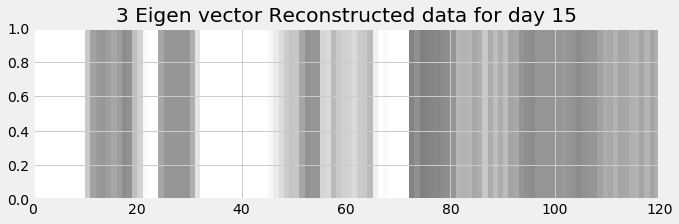

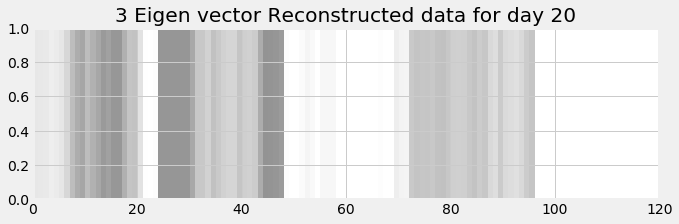

In [232]:
for i in range(len(indices)):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,i+1),
    plt.title('3 Eigen vector Reconstructed data for day {}'.format(indices[i]))
    plt.imshow(MBW_recons[indices[i]-1:indices[i],:],vmin=-0.25,vmax=0.25,extent=[0,120,0,1], aspect='auto',cmap=cm.Greys_r)
    # plt.axis('off')

## What percentage of the variance of the entire data the first 3 eigenvectors account for? How many eigenvectors do you need to reconstruct each of the 3 sample days with more than 75% accuracy? (10 pts) 


In [233]:
print('The explained variance of each principal component is:')
print(pca.explained_variance_ratio_)
###Total explained variance
print('Total explained variance for top 3 principal components :',sum(pca.explained_variance_ratio_))

The explained variance of each principal component is:
[0.36711954 0.13310365 0.03815174]
Total explained variance for top 3 principal components : 0.5383749300631988


In [234]:
pca120 = PCA(n_components = 120)

## fit model to data
pca120.fit(df) 

## sum number of principal components that account for 75% of Variance
print('Sum of number of principal components that account for 75% of Variance')
print(sum(pca120.explained_variance_ratio_[:12]))

Sum of number of principal components that account for 75% of Variance
0.7519635525985064


### Plot the data projected in the first vs. the Second PCA, coloring the scatter plot according to the Euclidean distance to the mean. Present two scatter plots, using different number of components for the PCA, one scatter plot with number_c= 2 and another using number_c=5, what is the difference between the distances? (20 pts) 

#### n_components =2


In [235]:
# Compute the euclidean distance using the first 2 PCs

number_c=2
euclidean = np.zeros(Mbw.shape[0])

pca = PCA(n_components=number_c)  ##Estimates the components
pca.fit(Mbw)
Mbw_score = pca.transform(Mbw) ##Calculates the loadings or scores

for i in range(number_c):
    euclidean += (Mbw_score[:, i] - np.mean(Mbw_score[:,:10]))**2/np.var(Mbw_score[:,:10])

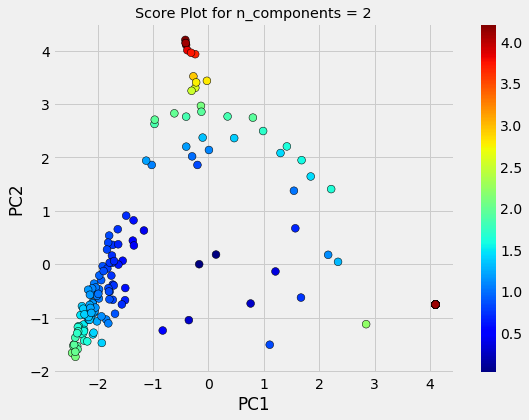

In [236]:
colors = [plt.cm.jet(float(i)/max(euclidean)) for i in euclidean]
fig = plt.figure(figsize=(8,6))
norm = mpl.colors.Normalize(vmin=min(euclidean),vmax=max(euclidean)) #for colorbar
cmap = mpl.cm.jet
fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=cmap))

with plt.style.context(('ggplot')):
    cm = colors
    plt.scatter(Mbw_score[:, 0], Mbw_score[:, 1], c=colors, edgecolors='k', s=60)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Score Plot for n_components = 2')
plt.show()

### n_components =5

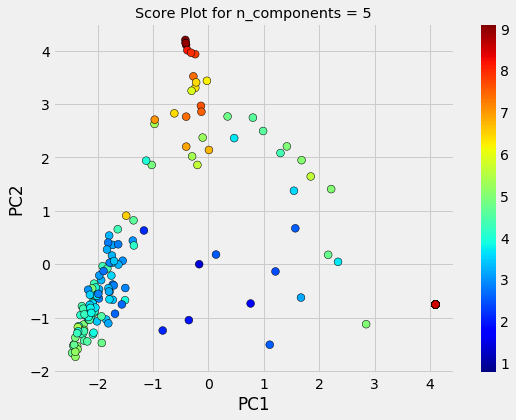

In [237]:
# Compute the euclidean distance using the first 2 PCs

number_c=5
euclidean = np.zeros(Mbw.shape[0])

pca = PCA(n_components=number_c)  ##Estimates the components
pca.fit(Mbw)
Mbw_score = pca.transform(Mbw) ##Calculates the loadings or scores

for i in range(number_c):
    euclidean += (Mbw_score[:, i] - np.mean(Mbw_score[:,:10]))**2/np.var(Mbw_score[:,:10])
    
colors = [plt.cm.jet(float(i)/max(euclidean)) for i in euclidean]
fig = plt.figure(figsize=(8,6))
norm = mpl.colors.Normalize(vmin=min(euclidean),vmax=max(euclidean)) #for colorbar
cmap = mpl.cm.jet
fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=cmap))

with plt.style.context(('ggplot')):
    cm = colors
    plt.scatter(Mbw_score[:, 0], Mbw_score[:, 1], c=colors, edgecolors='k', s=60)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Score Plot for n_components = 5')
plt.show()

### Again use number_c= 2 and number_c=5 for the PCA decomposition, project the data in number_c PCs and calculate Kmeans clustering in each case. Plot the square distance vs. numbers of clusters K for each case (20 pts) • With the two plots of the previous 

### number_c=2

In [238]:
from sklearn.cluster import KMeans
number_c=2
pca = PCA(number_c)
projected_data = pca.fit_transform(df)

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(projected_data)
    Sum_of_squared_distances.append(km.inertia_)

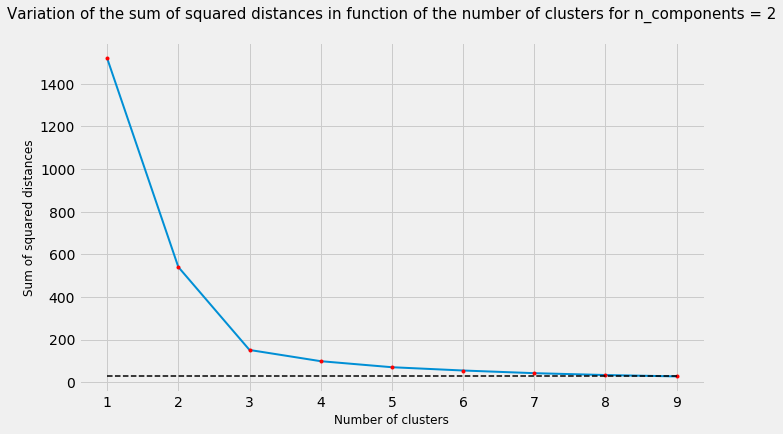

In [239]:
plt.figure(figsize = (10,6))
ax = plt.gca()
plt.plot(K, Sum_of_squared_distances, linewidth = 2)
plt.plot(K, Sum_of_squared_distances, '.', c='r',markersize = 6)
plt.plot(K,[Sum_of_squared_distances[-1] for i in range(len(Sum_of_squared_distances))],'--',
         linewidth = 1.5, c = 'black')

plt.xlabel('Number of clusters', fontsize = 12)
plt.ylabel('Sum of squared distances', fontsize = 12)
plt.title('Variation of the sum of squared distances in function of the number of clusters for n_components = 2', fontsize = 15, y = 1.05)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
#plt.xticks(np.arange(1, 21, step=1))
ax.grid(True)
plt.show()

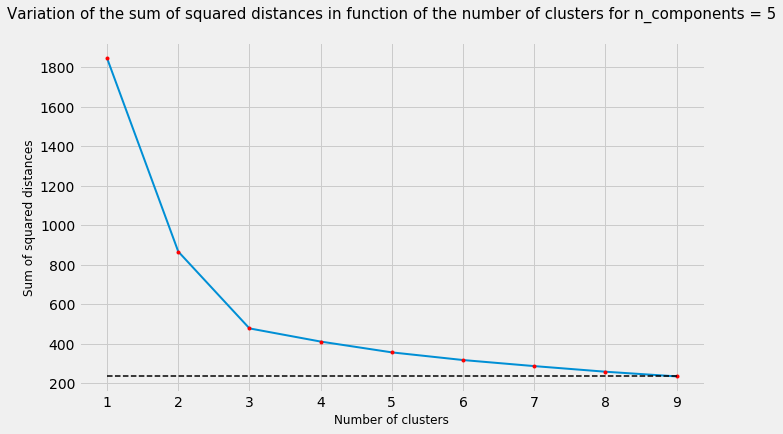

In [240]:
number_c=5
pca = PCA(number_c)
projected_data = pca.fit_transform(df)

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(projected_data)
    Sum_of_squared_distances.append(km.inertia_)

## plot sum squared distance versys number of clusters
plt.figure(figsize = (10,6))
ax = plt.gca()
plt.plot(K, Sum_of_squared_distances, linewidth = 2)
plt.plot(K, Sum_of_squared_distances, '.', c='r',markersize = 6)
plt.plot(K,[Sum_of_squared_distances[-1] for i in range(len(Sum_of_squared_distances))],'--',
         linewidth = 1.5, c = 'black')

plt.xlabel('Number of clusters', fontsize = 12)
plt.ylabel('Sum of squared distances', fontsize = 12)
plt.title('Variation of the sum of squared distances in function of the number of clusters for n_components = 5', fontsize = 15, y = 1.05)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
#plt.xticks(np.arange(1, 21, step=1))
ax.grid(True)
plt.show()

In [241]:
from sklearn.cluster import KMeans
number_c=2
pca = PCA(number_c)
projected_data = pca.fit_transform(df)
n_clusters = 3

# fit kmeans object to data
km = KMeans(n_clusters=n_clusters)
km.fit(projected_data)
# # print location of clusters learned by kmeans object
# print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = km.fit_predict(projected_data)  ## based on centroids their colors below are cyan, red, black and blue 

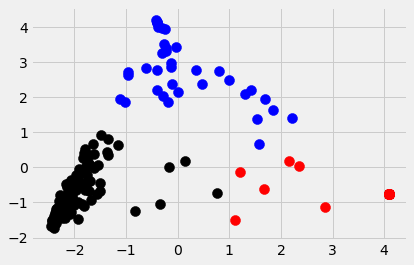

In [242]:
plt.scatter(projected_data[y_km ==0,0], projected_data[y_km == 0,1], s=100, c='red') ###Need other ways to 
                                                                                      ##visualize centroids
plt.scatter(projected_data[y_km ==1,0], projected_data[y_km == 1,1], s=100, c='black')
plt.scatter(projected_data[y_km ==2,0], projected_data[y_km == 2,1], s=100, c='blue')

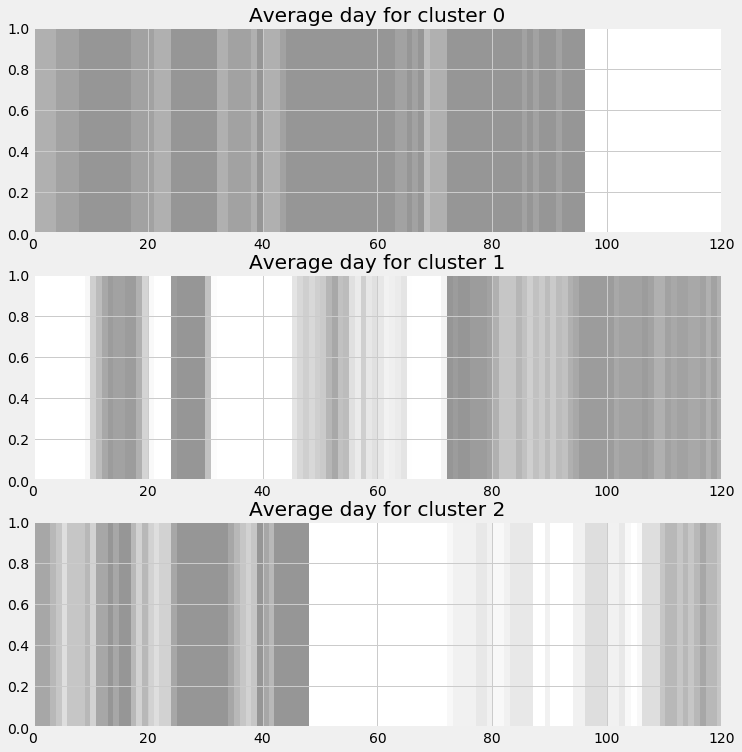

In [263]:
# i=0
# # plt.imshow(Mbw[indices[i]-1:indices[i],:],vmin=-0.25,vmax=0.25,extent=[0,120,0,1], aspect='auto')
# temp = np.reshape(np.mean(Mbw[y_km ==i], axis = 0), (1,120))
# title = 'Average day for cluster ' + str(j)
# plt.tite
# plt.imshow(temp,vmin=-0.25,vmax=0.25,extent=[0,120,0,1], aspect='auto', cmap = 'Greys_r')

k=3
plt.figure(figsize=(11,12))
for j in range(k):
    plt.subplot(3, 1, j+1)
    temp = np.reshape(np.mean(Mbw[y_km ==j], axis = 0), (1,120))
    title = 'Average day for cluster ' + str(j)
    plt.title(title)
    plt.imshow(temp,vmin=-0.25,vmax=0.25,extent=[0,120,0,1], aspect='auto', cmap = 'Greys_r')

  

## Problem 2: Clustering Electric Consumption with PCA (50 pts)
### Load and plot data provided in TypicalWeekdayProfile.txt, it has the average reads of energy consumption in kilowatts [KW]each 15 minutes interval during one day for several accounts. How many accounts are given? and What is the dimension of the data? (10 pts)


In [110]:
# np.load_txt()
profile_data = pd.read_csv('TypicalWeekdayProfile.txt',sep = '\t',header=None)

profile_data.head(3)


(1255, 96)


,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.0271,0.0222,0.0214,0.0144,0.0131,0.0158,0.0156,0.0137,0.0134,0.0113,...,0.0325,0.0456,0.0468,0.0377,0.0427,0.0456,0.0328,0.0316,0.0349,0.0337
1,0.2108,0.2115,0.2108,0.2104,0.2079,0.2081,0.2058,0.2049,0.2050,0.2028,...,0.2069,0.2043,0.2109,0.2143,0.2143,0.2092,0.2102,0.2081,0.2066,0.2050
2,0.0446,0.0458,0.0452,0.0453,0.0438,0.0439,0.0440,0.0451,0.0445,0.0450,...,0.0454,0.0462,0.0457,0.0453,0.0447,0.0452,0.0443,0.0443,0.0449,0.0462


In [112]:
## Dimensions of the data
print('Dimensions of the data: ', profile_data.shape)
## Number of Accounts given
print('Number of Accounts given: ',len(profile_data))

Dimensions of the data:  (1255, 96)
Number of Accounts given:  1255


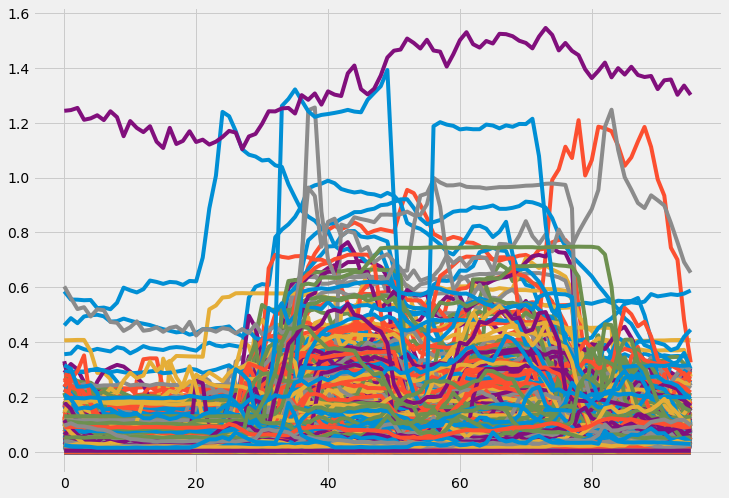

In [123]:
## Plot daily data for all users
# i = 0
plt.figure(figsize=(11,8))
for i in range(len(profile_data)):
    plt.plot(range(96),profile_data[i:i+1].values[0]);

In [120]:
len(profile_data[i:i+1].values[0])

96

### Plot the first 6 eigenvectors, convert the x axis in a range from 1 to 24hs (10 pts)


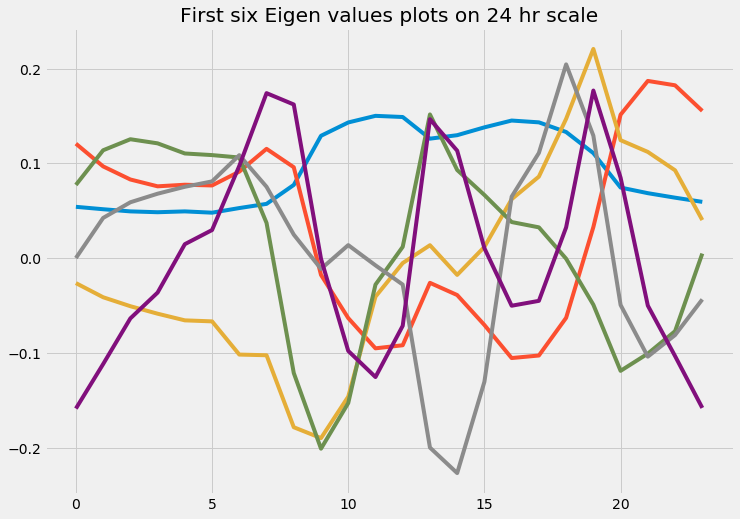

In [144]:
n_components = 96
pca = PCA(n_components = n_components )

pca.fit(profile_data)

# projected_data = pca.fit_transform(profile_data)
# profile_recons = pca.inverse_transform(pca.fit_transform(profile_data))

## plot first six pca components
componensts = pca.components_
plt.figure(figsize=(11,8))
plt.title('First six Eigen values plots on 24 hr scale')
for i in range(6):
    plt.plot(range(24),componensts[i][::4]);


### How many K eigenvectors are needed to explain at least 92% of the variance? (10 pts)

In [168]:
sum(pca.explained_variance_[:51])

0.9200698478044617

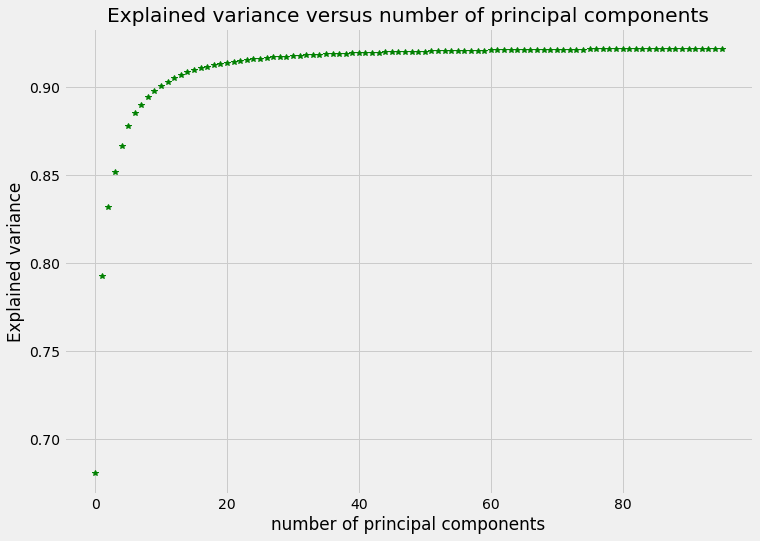

In [154]:
plt.figure(figsize =(11,8))
plt.title('Explained variance versus number of principal components')
plt.xlabel('number of principal components')
plt.ylabel('Explained variance')
plt.plot(range(96),np.cumsum(pca.explained_variance_),'*g')

### Use that number to apply K Means with K equal to the answer above, show the clusters given by the method coloring each cluster differently in the scores of PC2 vs. PC1 space. (10 pts) 


In [171]:
number_c = 96
pca = PCA(number_c)
projected_data = pca.fit_transform(profile_data)
n_clusters = 52
## create kmeans object
kmeans = KMeans(n_clusters = n_clusters)
# fit kmeans object to data
kmeans.fit(projected_data)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(projected_data)  ## based on centroids their colors below are cyan, red, black and blue 


[[-4.58887917e-01 -9.51699723e-02 -2.94876146e-02 ... -5.38475956e-05
  -2.17148471e-04  4.83618994e-05]
 [ 2.42462936e+00  5.79993528e-02 -1.78698054e-01 ...  1.44943506e-03
   1.52225643e-03 -1.34546762e-03]
 [ 1.07384731e+00 -3.98800779e-01 -8.92390899e-02 ... -4.21197482e-04
   1.01615840e-04  1.47249287e-04]
 ...
 [ 3.50080026e-01 -4.70545643e-02  3.36362355e-01 ...  1.78834290e-03
  -1.03282834e-03  2.23485523e-05]
 [ 7.57709767e-01  5.92730813e-01  1.37080976e-01 ... -1.19183093e-03
   1.00970779e-03  2.49119846e-04]
 [ 3.79399268e-02 -2.50371814e-01  1.46768304e-01 ...  8.30850924e-05
   3.51951297e-05 -6.35409487e-04]]


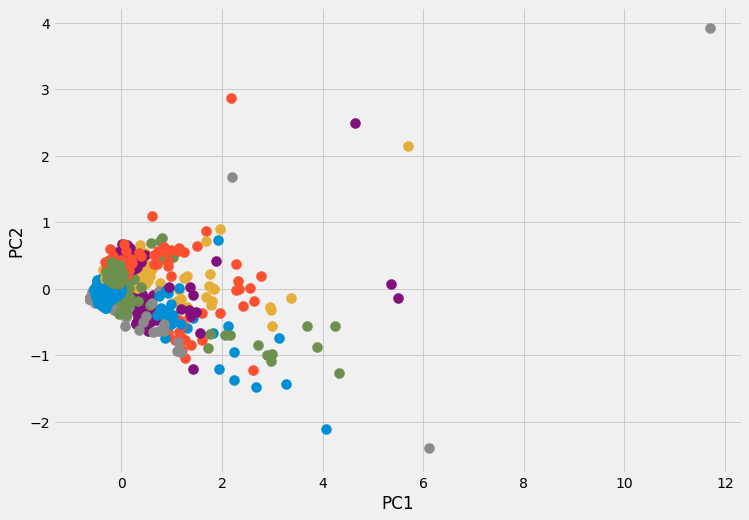

In [176]:
# i = 0
k= 52
plt.figure(figsize=(11,8))
plt.xlabel('PC1')
plt.ylabel('PC2')
for i in range(K):
    plt.scatter(projected_data[y_km ==i,0], projected_data[y_km == i,1], s=100)

### Plot the data of the original accounts separated in K subplots. What can you learn from the accounts that belong to each of the K clusters (see a sample solution with K=4) (10 pts)

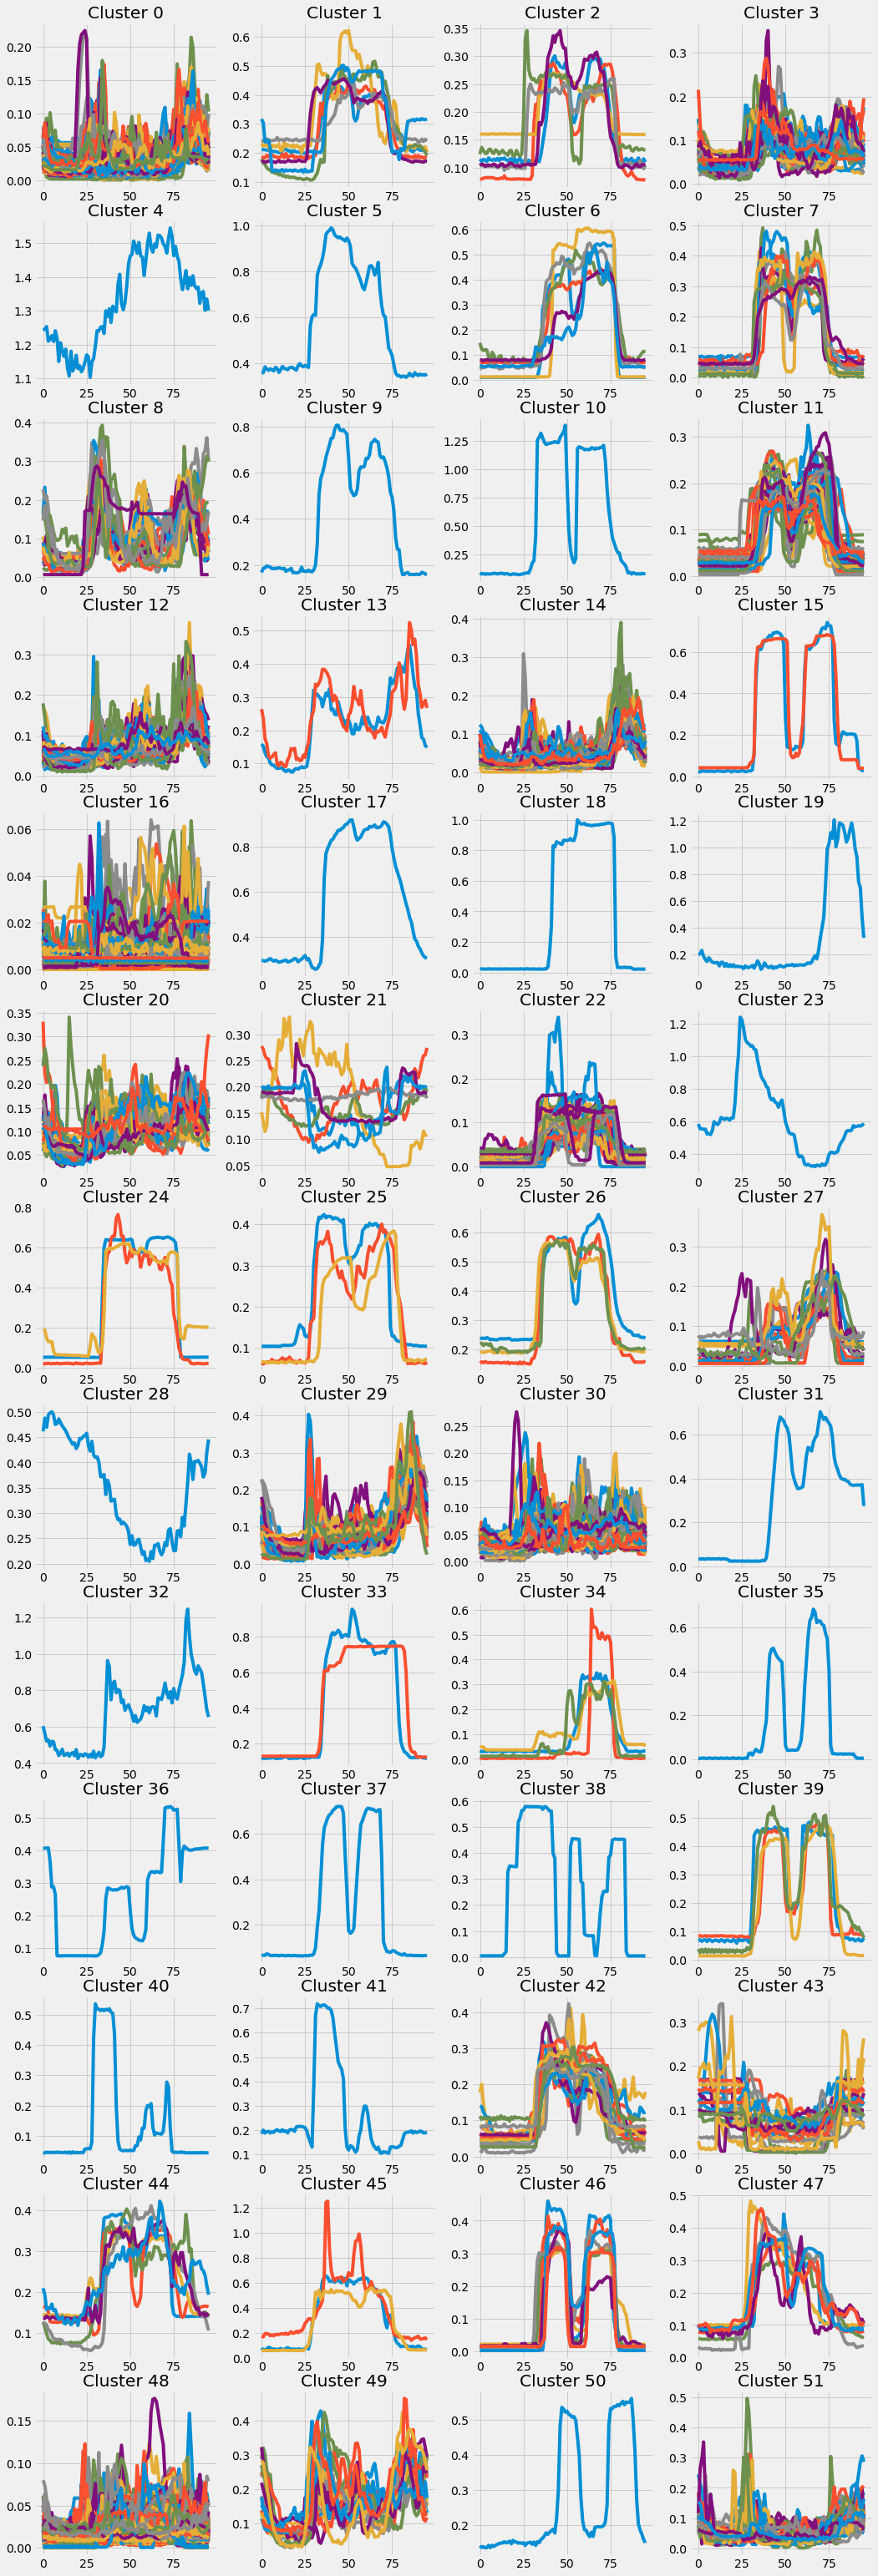

In [206]:
# projected_data.shape
# temp = profile_data[y_km ==1]
# for j in range(temp.shape[0]):
# #     print(temp[j:j+1].shape)
#     plt.plot(temp[j:j+1].values.T)
k= 52
plt.figure(figsize=(16,52))
for i in range(k):
    plt.subplot(13, 4, i+1)
    temp = profile_data[y_km ==i]
    for j in range(temp.shape[0]):
        title = 'Cluster '+ str(i)
        plt.title(title)
    #     print(temp[j:j+1].shape)
        plt.plot(temp[j:j+1].values.T)
  